# Monday, March 3rd

**Exercise.** Write a function `mayfly_model` that takes in an initial population `y0`, a growth rate `b`, and an integer `N`, and returns a list of $y_0$, $y_1$, $y_2$, .. $y_N$ where

$$ y_n = b(1- y_{n-1})y_{n-1}.$$

In [9]:
def mayfly_model(b,y0,N):
    y_list = [y0]
    for n in range(N):
        y_n = y_list[n]
        y_np1 = b*(1-y_n)*y_n
        y_list.append(y_np1)
    return y_list

In [10]:
mayfly_pop = mayfly_model(3, .25, 20)
mayfly_pop[:5]

[0.25, 0.5625, 0.73828125, 0.5796661376953125, 0.7309599195141345]

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mayfly population')

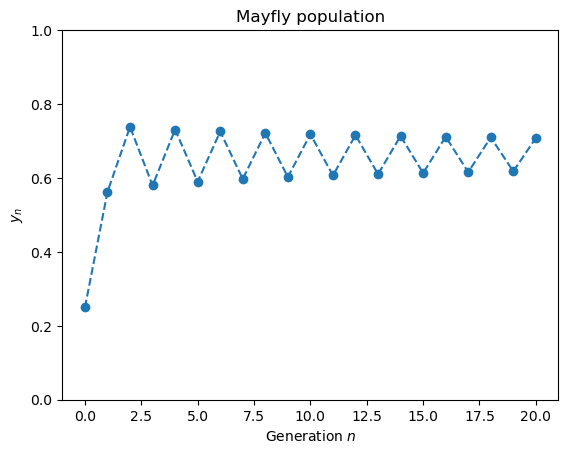

In [12]:
plt.plot(mayfly_pop,'o--')
plt.ylim(0,1)

plt.xlabel('Generation $n$')
plt.ylabel('$y_n$')
plt.title('Mayfly population')

Let's compare two mayfly populations: one with $b = 3$, $y_0 = .25$, and another with $b = 1.5$, $y_0 = .75$:

In [13]:
N = 20
b_list = [3, 1.5, 2.5]
y0_list = [.25, .75, .5]

n_list = np.arange(N+1)

mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list, y0_list)]

Text(0.5, 1.0, 'Mayfly population')

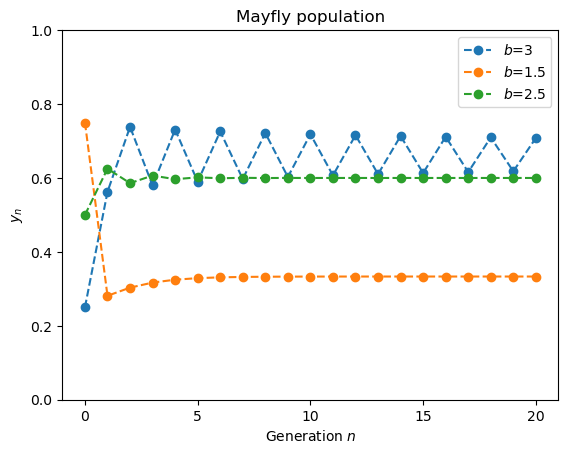

In [18]:
for b,y0,mayfly_pop in zip(b_list,y0_list,mayfly_pops):
    plt.plot(n_list, mayfly_pop,'o--',label='$b$={}'.format(b))

plt.legend()

plt.ylim(0,1)

plt.xticks(n_list[::5])

plt.xlabel('Generation $n$')
plt.ylabel('$y_n$')
plt.title('Mayfly population')

In [44]:
def plot_mayfly_pops(b_list, y0_list, N, title='Mayfly population'):
    n_list = np.arange(N+1)
    
    mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list, y0_list)]
    for b,y0,mayfly_pop in zip(b_list,y0_list,mayfly_pops):
        plt.plot(n_list, mayfly_pop,'o--',label='$b$={}'.format(b))

    plt.legend()
    plt.ylim(0,1)
    plt.xticks(n_list[::5])

    plt.xlabel('Generation $n$')
    plt.ylabel('$y_n$')
    plt.title(title)

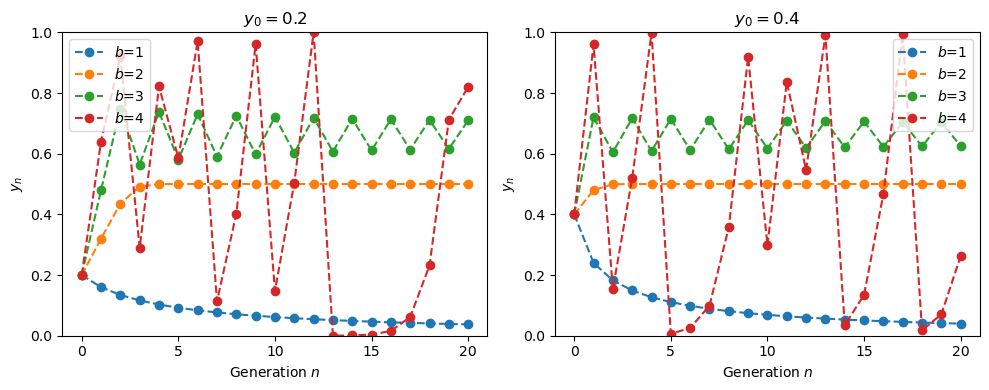

In [45]:
N = 20


fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
b_list = [1,2,3,4]
y0 = .2
y0_list = [y0 for b in b_list]
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0))

plt.subplot(1,2,2)
b_list = [1,2,3,4]
y0 = .4
y0_list = [y0 for b in b_list]
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0))

plt.tight_layout()

**Exercise.** Modify the Lissajous curve slider code to plot mayfly model populations with sliders for $y_0$ and $b$:

Note: the `notebook` backend puts a interactives directly in the Jupyter notebook. We can alternatively use the `qt` backend to generate external interactive plots, which might run faster.

In [30]:
%matplotlib notebook

In [1]:
%matplotlib qt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from matplotlib.widgets import Slider  # import the Slider widget

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 5   # the value of the parameter a to be used initially, when the graph is created

b_min = 0
b_max = 10
b_init = 5

t = np.linspace(0, 2*np.pi, 1000)
x = np.sin(a_init*t)
y = np.cos(b_init*t)

fig = plt.figure(figsize=(4,4))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
lissajous_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
a_slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
b_slider_ax = plt.axes([0.1, 0, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(lissajous_ax) # select sin_ax
plt.title('x = sin(at), y = cos(bt)')
lissajous_plot, = plt.plot(x, y, 'r')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(a_slider_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

b_slider = Slider(b_slider_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(dummy):
    # We can access the current value of any slider using <slider>.val
    # E.g. a_slider.val gives the current value of the a_slider
    # b_slider.val gives the current value of the b_slider
    x = np.sin(a_slider.val*t)
    y = np.cos(b_slider.val*t)
    lissajous_plot.set_xdata(x) # set new y-coordinates of the plotted points
    lissajous_plot.set_ydata(y)
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

Note: We can disable interactive mode and return to normal mode using the magic `%matplotlib inline`

In [5]:
%matplotlib inline

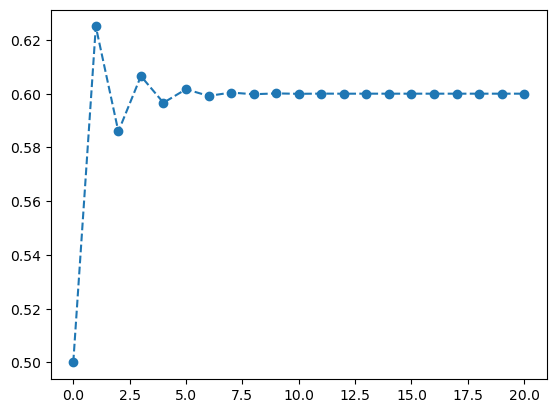

In [29]:
plt.plot(mayfly_pop,'o--')

# Wednesday, March 5th

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Recall: we previously discussed working with multi-dimensional arrays, for example 2D arrays.

In [2]:
a = np.arange(100).reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

A very useful tool for visualizing 2D arrays is the `plt.imshow` function:

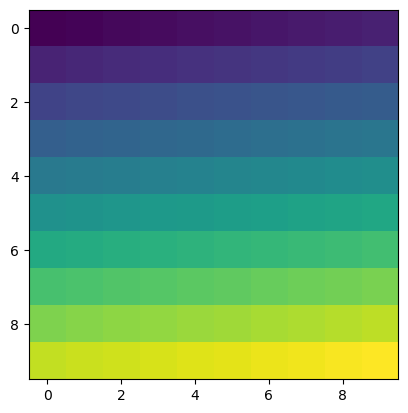

In [3]:
plt.imshow(a)

Let's make some changes to our array and then use `plt.imshow` again:

In [4]:
a[3:5, 6:8] = 120
print(a)

[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35 120 120  38  39]
 [ 40  41  42  43  44  45 120 120  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99]]


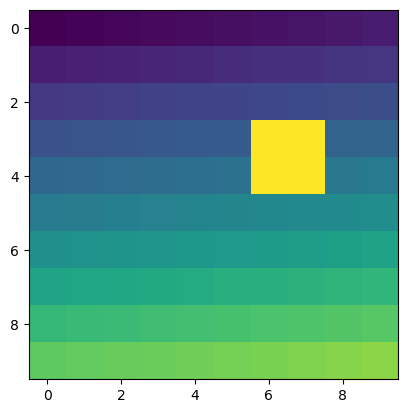

In [5]:
plt.imshow(a)

By default, the `plt.imshow` function will find the highest value in the array and assign in the "brightest" color, yellow, and find the lowest value in the array and assign it the "darkest" color, dark blue. Any intermediate value in the array is assigned an intermediate color.

There are many options for modifying the `plt.imshow` behavior. For example:
 - We can supply a value `vmin` that the "darkest" color will be assigned to. Any values in the array that are below this minimum value will also be mapped to the "darkest" color.
 - We can supply a value `vmax` that the "brightest" color will be assigned to. Any values in the array that are above this maximum value will also be mapped to the "brightest" color.

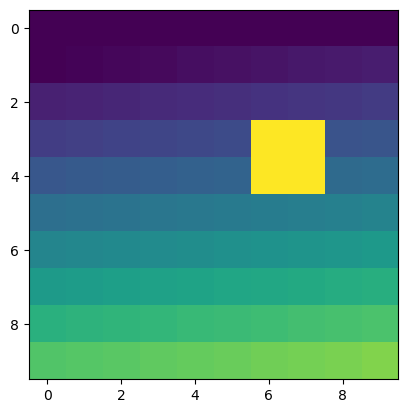

In [6]:
plt.imshow(a, vmin=10)

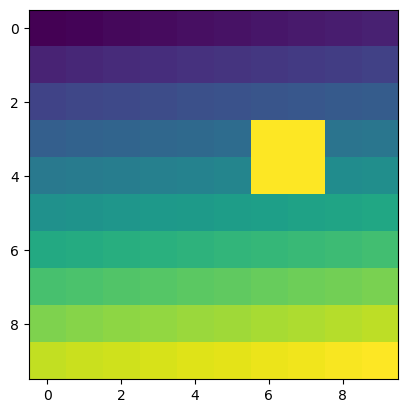

In [7]:
plt.imshow(a, vmax = 99)

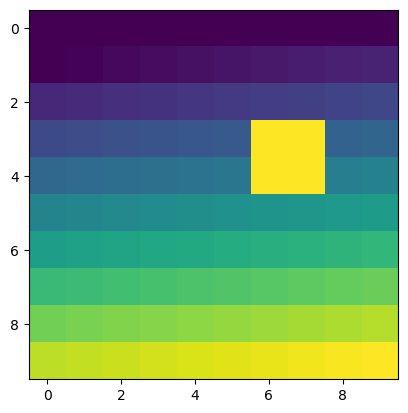

In [8]:
plt.imshow(a, vmin=10, vmax = 99)

By default, `plt.imshow` will not interpolate colors between neighboring array positions. That is, we can see a discrete set of "boxes" of colors. We can modify this behavior by using the `interpolation` keyword:

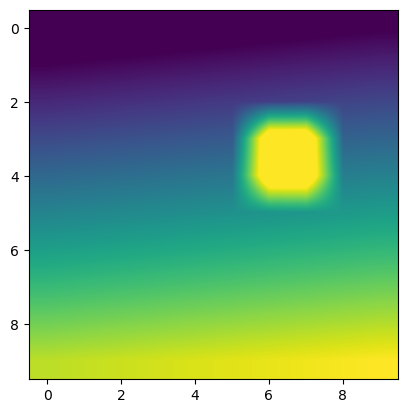

In [9]:
plt.imshow(a, vmin=10, vmax = 99, interpolation='bilinear')

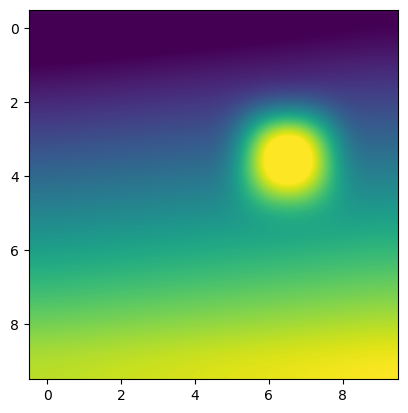

In [11]:
plt.imshow(a, vmin=10, vmax = 99, interpolation='bicubic')

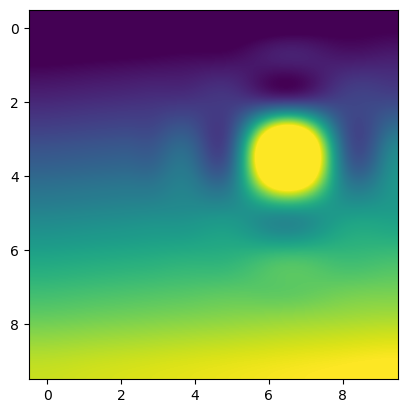

In [12]:
plt.imshow(a, vmin=10, vmax = 99, interpolation='lanczos')

We can also modify the color choices used by `plt.imshow`. These choices are called **colormaps**. A collection of colormaps can be found on the [Matplotlib documentation page](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

The `cmap` keyword argument can be used to change colormaps:

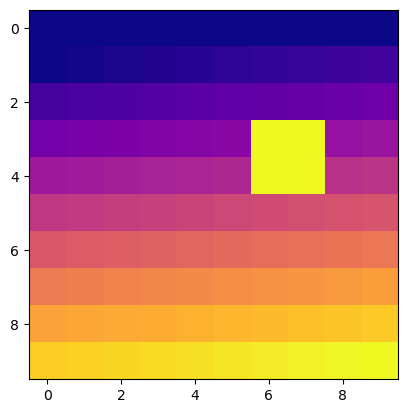

In [13]:
plt.imshow(a, vmin=10, vmax = 99, cmap='plasma')

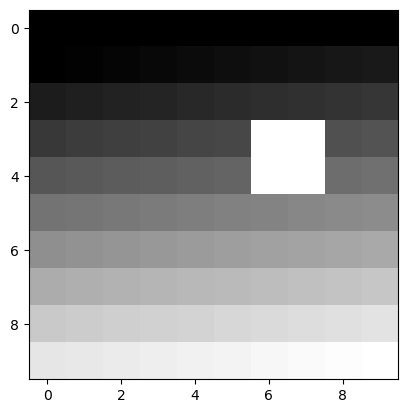

In [14]:
plt.imshow(a, vmin=10, vmax = 99, cmap='grey')

Note: in the previous figures, it's not possible to tell what colors correspond to what values. We can add a colorbar to fix this, by using `plt.colorbar`:

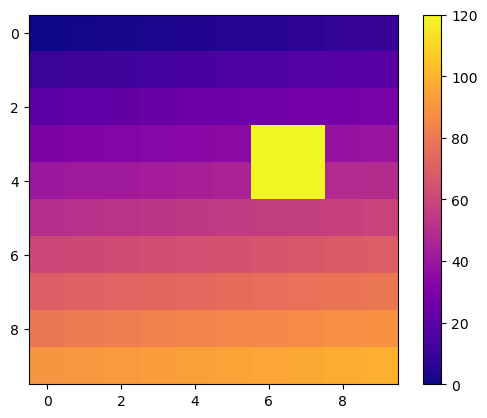

In [15]:
plt.imshow(a, cmap='plasma')
plt.colorbar()

We can also use colormaps with regular plotting:

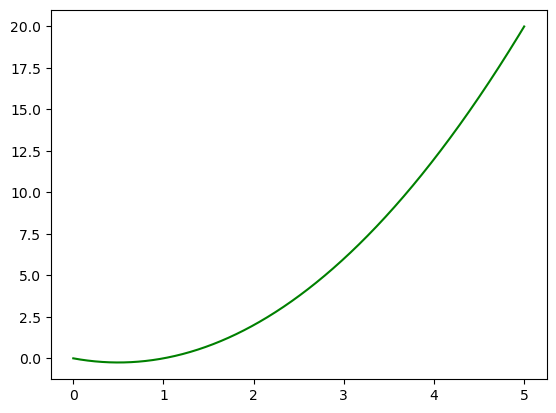

In [19]:
x = np.linspace(0,5,1000)
y = x**2 - x

plt.plot(x,y, color = 'g')

In [20]:
import matplotlib.cm as cm

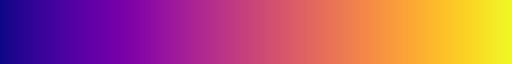

In [21]:
cm.plasma

To use colormap to select a color, we just plug a float between 0 (where the left-end of the color map corresponds to 0) and (where the right-end of the color map correspond to 1).

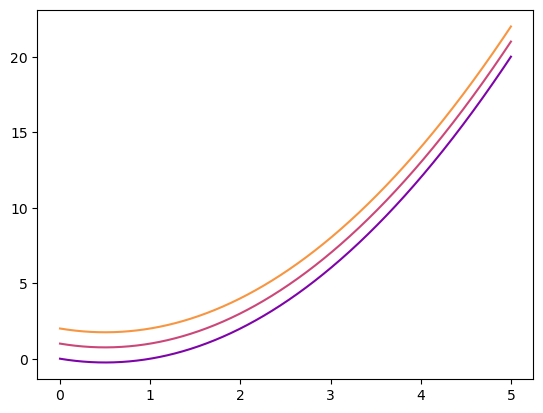

In [24]:
x = np.linspace(0,5,1000)
y = x**2 - x

plt.plot(x,y, color = cm.plasma(.25))
plt.plot(x,y+1, color = cm.plasma(.5))
plt.plot(x,y+2, color = cm.plasma(.75))

What do we actually get when we plug in a number to a color map?

In [26]:
cm.plasma(.25)

(0.494877, 0.01199, 0.657865, 1.0)

The tuple above is an **RGBA** value, where R is the amount of red, G is the amount of green, B is the amount of blue, and A is the opacity. We can supply our own RGB(A) values to the `plt.plot` function:

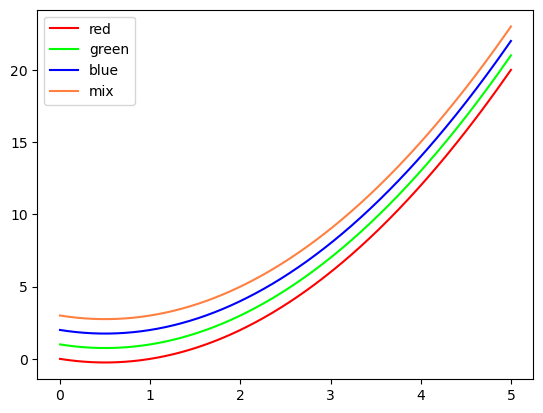

In [28]:
x = np.linspace(0,5,1000)
y = x**2 - x

plt.plot(x,y, color = (1., 0., 0.), label='red')
plt.plot(x,y+1, color = (0., 1., 0.), label='green')
plt.plot(x,y+2, color = (0., 0., 1.), label='blue')

plt.plot(x,y+3, color=(1., .5, .25), label='mix')

plt.legend()

Can we use RGB values with 2D dimensional data and `plt.imshow`? We can use a 3D-dimensional array where the first dimension is the row or vertical position, the second dimension is the column or horizontal position, and the third dimension is R/G/B position (and has length 3).

In [29]:
RGB_array = np.zeros((10,10,3))

For the above array, we will think of `RGB_array[:,:,0]` as containing the red data. Similarly, `RGB_array[:,:,1]` contains the green data, and `RGB_array[:,:,2]` contains the blue data.

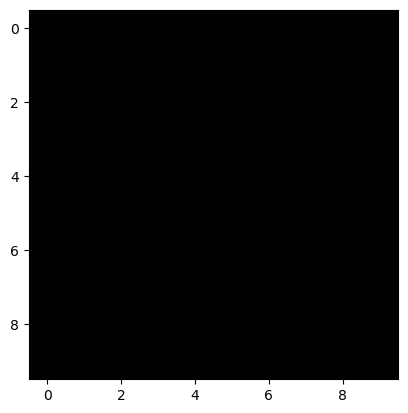

In [30]:
plt.imshow(RGB_array)

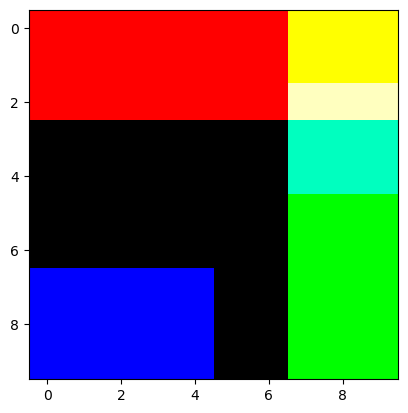

In [38]:
RGB_array[:3, :, 0] = 1  # set the first three rows to full red
RGB_array[:, -3:,1] = 1  # set the last three columns to full green
RGB_array[-3:,:5,2] = 1  # set the entries in the last three rows and first five columns to full blue

RGB_array[2:5, 7:, 2] = .75

plt.imshow(RGB_array)

With this setup, we can work with images in Python. We can use `plt.imread` to read in an image file and convert it into an RGB array:

In [39]:
pilotwings = plt.imread('pilotwings.jpg')

In [41]:
pilotwings.shape

(662, 868, 3)

This array has 662 rows (vertical resolution of the image), 868 columns (horizontal resolution) and three color channels (Red/Green/Blue).

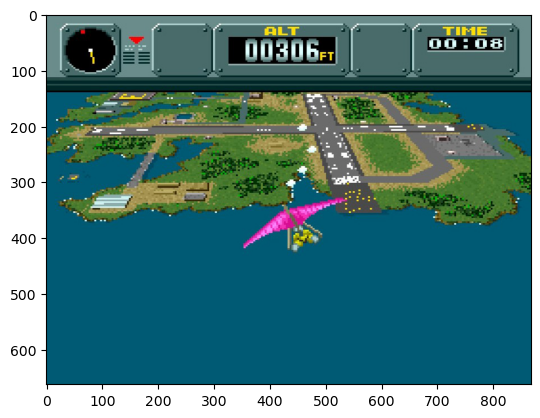

In [42]:
plt.imshow(pilotwings)

In [43]:
pilotwings[0,0]

array([106, 140, 139], dtype=uint8)

Note: for this image, it was read with integer RGB values rather than floating values. In this case, `0` means no color and `255` means full color (analogous `0` and `1` for floating point data). We can go back to floating point data by dividing by 255:

In [44]:
pilotwings = pilotwings / 255

In [45]:
pilotwings[0,0]

array([0.41568627, 0.54901961, 0.54509804])

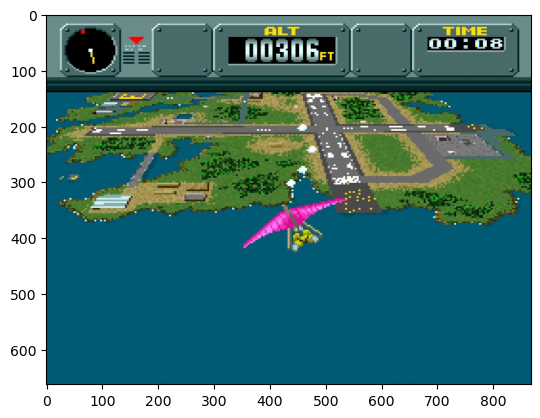

In [46]:
plt.imshow(pilotwings)

In [48]:
new_pilotwings = pilotwings.copy()

new_pilotwings[200:400, 600:800, 2] = 0   # remove blue information from rows 200 to 400 and columns 600 to 800

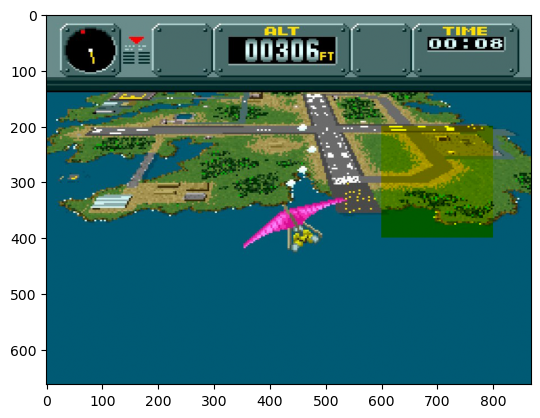

In [50]:
plt.imshow(new_pilotwings)

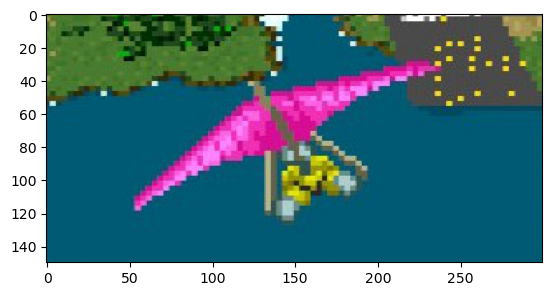

In [53]:
plt.imshow(new_pilotwings[300:450, 300:600])